## Linear Regression


In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
# Preparing data
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, random_state=42)

# Transform input array(length as the only feature) to 2-dimensional array
train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)

[39.01714496] -709.0186449535477
[1241.83860323]


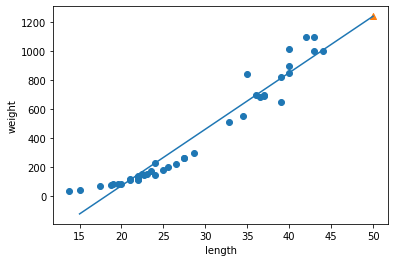

Problem: weight value could be negative; model is too simple

0.939846333997604
0.8247503123313558
Both scores are low - underfitting


In [3]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(train_input, train_target)
# Model Parameters (Case-Based Learning)
print(lr.coef_, lr.intercept_)

print(lr.predict([[50]]))

plt.scatter(train_input, train_target)
# draw linear line
plt.plot([15, 50], [15 * lr.coef_ + lr.intercept_, 50 * lr.coef_ + lr.intercept_])
plt.scatter(50, 1241, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()
print('Problem: weight value could be negative; model is too simple')
print()

# Compare R^2 scores from train and test sets
print(lr.score(train_input, train_target))
print(lr.score(test_input, test_target))
print('Both scores are low - underfitting')

### Polynomial Regression

#### Convert to Quadratic Equation

In [4]:
# Add a new (square) variable for quadratic equation
train_poly = np.column_stack((train_input ** 2, train_input))
test_poly = np.column_stack((test_input ** 2, test_input))
print(train_input.shape, test_input.shape)
print(train_poly.shape, test_poly.shape)

(42, 1) (14, 1)
(42, 2) (14, 2)


[  1.01433211 -21.55792498] 116.0502107827827
[1573.98423528]


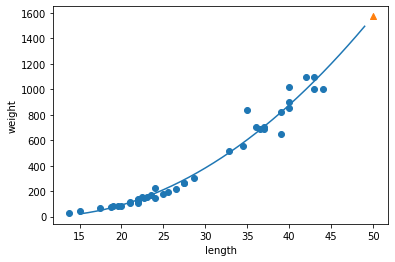

0.9706807451768623
0.9775935108325122


In [5]:
lr.fit(train_poly, train_target)
print(lr.coef_, lr.intercept_)

print(lr.predict([[50**2, 50]]))

plt.scatter(train_input, train_target)
# draw curved line
point = np.arange(15, 50)
plt.plot(point, lr.coef_[0] * point ** 2 +  lr.coef_[1] * point + lr.intercept_)
plt.scatter(50, 1574, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

# Compare R^2 scores from train and test sets
print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))

### Multiple Regression

#### Feature Engineering (`PolynomialFeatures` Transformer)

In [6]:
from sklearn.preprocessing import PolynomialFeatures

In [7]:
# Preparing Data using pandas
import pandas as pd

In [8]:
# Preparing panda data frame by importing csv file (read_csv())
df = pd.read_csv('https://bit.ly/perch_csv_data')

# Converting data frame to numpy array
perch_full = df.to_numpy()
#print(perch_full) # (length, height, width)

train_input, test_input, train_target, test_target = train_test_split(perch_full, perch_weight, random_state=42)

In [9]:
# Create Polynomial Features
poly = PolynomialFeatures(include_bias=False) # exclude bias(degree zero term)
poly.fit(train_input)
print(poly.get_feature_names_out())

train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)
print(train_poly.shape, test_poly.shape)

['x0' 'x1' 'x2' 'x0^2' 'x0 x1' 'x0 x2' 'x1^2' 'x1 x2' 'x2^2']
(42, 9) (14, 9)


In [10]:
lr.fit(train_poly, train_target)

# Compare R^2 scores from train and test sets
print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))

0.9903183436982124
0.9714559911594134


In [11]:
# Set maximal degree feature as 5
poly = PolynomialFeatures(degree=5, include_bias=False)
poly.fit(train_input)
print(poly.get_feature_names_out())

train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)
print(train_poly.shape, test_poly.shape)

['x0' 'x1' 'x2' 'x0^2' 'x0 x1' 'x0 x2' 'x1^2' 'x1 x2' 'x2^2' 'x0^3'
 'x0^2 x1' 'x0^2 x2' 'x0 x1^2' 'x0 x1 x2' 'x0 x2^2' 'x1^3' 'x1^2 x2'
 'x1 x2^2' 'x2^3' 'x0^4' 'x0^3 x1' 'x0^3 x2' 'x0^2 x1^2' 'x0^2 x1 x2'
 'x0^2 x2^2' 'x0 x1^3' 'x0 x1^2 x2' 'x0 x1 x2^2' 'x0 x2^3' 'x1^4'
 'x1^3 x2' 'x1^2 x2^2' 'x1 x2^3' 'x2^4' 'x0^5' 'x0^4 x1' 'x0^4 x2'
 'x0^3 x1^2' 'x0^3 x1 x2' 'x0^3 x2^2' 'x0^2 x1^3' 'x0^2 x1^2 x2'
 'x0^2 x1 x2^2' 'x0^2 x2^3' 'x0 x1^4' 'x0 x1^3 x2' 'x0 x1^2 x2^2'
 'x0 x1 x2^3' 'x0 x2^4' 'x1^5' 'x1^4 x2' 'x1^3 x2^2' 'x1^2 x2^3' 'x1 x2^4'
 'x2^5']
(42, 55) (14, 55)


In [12]:
lr.fit(train_poly, train_target)

# Compare R^2 scores from train and test sets
print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))
print('Overfitting')

0.9999999999991097
-144.40579242684848
Overfitting


#### Regularization (`StandardScaler` Transformer)



In [13]:
from sklearn.preprocessing import StandardScaler

In [14]:
ss = StandardScaler()
ss.fit(train_poly)
train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)

#### Ridge and Lasso
- Ridge : L2 Regularization (squared magnitude of coefficient as penalty term)
- Lasso : L1 Regularization (absolute value of magnitude of coefficient as penalty term)

In [15]:
from sklearn.linear_model import Ridge, Lasso

In [16]:
ridge = Ridge()
ridge.fit(train_scaled, train_target)

# Compare R^2 scores from train and test sets
print(ridge.score(train_scaled, train_target))
print(ridge.score(test_scaled, test_target))

0.9896101671037343
0.9790693977615397


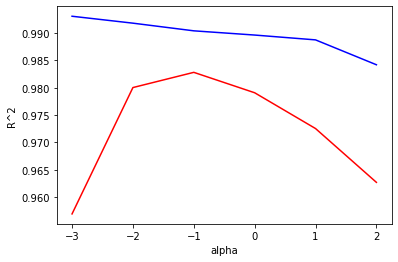

0.9903815817570366
0.9827976465386926


In [17]:
# Find the best alpha value(Hyperparameter)
train_score = []
test_score = []
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]

for alpha in alpha_list:
  ridge = Ridge(alpha=alpha)
  ridge.fit(train_scaled, train_target)
  train_score.append(ridge.score(train_scaled, train_target))
  test_score.append(ridge.score(test_scaled, test_target))

plt.plot(np.log10(alpha_list), train_score, color='b')
plt.plot(np.log10(alpha_list), test_score, color='r')
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()

ridge = Ridge(alpha=0.1)
ridge.fit(train_scaled, train_target)

# Compare R^2 scores from train and test sets
print(ridge.score(train_scaled, train_target))
print(ridge.score(test_scaled, test_target))

In [18]:
lasso = Lasso()
lasso.fit(train_scaled, train_target)

# Compare R^2 scores from train and test sets
print(lasso.score(train_scaled, train_target))
print(lasso.score(test_scaled, test_target))

0.989789897208096
0.9800593698421883


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.878e+04, tolerance: 5.183e+02
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.297e+04, tolerance: 5.183e+02
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


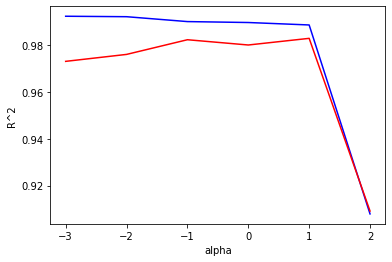

0.9888067471131867
0.9824470598706695
40


In [19]:
# Find the best alpha value(Hyperparameter)
train_score = []
test_score = []
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]

for alpha in alpha_list:
  lasso = Lasso(alpha=alpha, max_iter=10000) #ConvergenceWarning
  lasso.fit(train_scaled, train_target)
  train_score.append(lasso.score(train_scaled, train_target))
  test_score.append(lasso.score(test_scaled, test_target))

plt.plot(np.log10(alpha_list), train_score, color='b')
plt.plot(np.log10(alpha_list), test_score, color='r')
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()

lasso = Lasso(alpha=10)
lasso.fit(train_scaled, train_target)

# Compare R^2 scores from train and test sets
print(lasso.score(train_scaled, train_target))
print(lasso.score(test_scaled, test_target))

# Number of coeifficients that are zero (Lasso can make coefficient zero with absolute value)
print(np.sum(lasso.coef_ == 0))